<a href="https://colab.research.google.com/github/AaronRM9416/Core-Classwork/blob/main/Regression_Core_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Metrics**
Aaron Musselwhite


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, \
OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
set_config(display='diagram')

In [3]:
data='https://docs.google.com/spreadsheets/d/e/2PACX-1vT-rSDIBs1OyB-hyONIDtb4WdszbHNcyT2sUIf8CmLS98dWRKq5Bfyyc7Pt-XqsZS1QYgCUfs0i2u8p/pub?output=csv'

In [4]:
df= pd.read_csv(data)

In [5]:
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [6]:
df.duplicated().sum()

0

1) Make a heatmap of the correlations. Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price. We will limit our analysis to these three features.

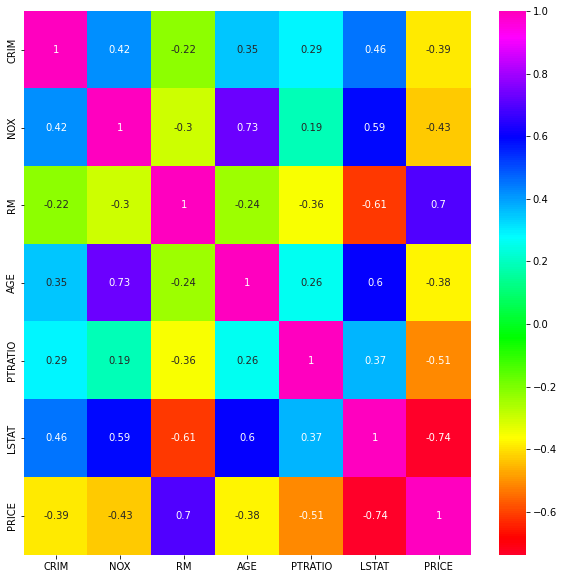

In [12]:
corr = df.corr()
plt.figure(figsize= (10,10))
sns.heatmap(corr, cmap='gist_rainbow', annot=True)

***Nox-age, nox-Lsat,rm-lstat, rm-price, age-Lstat,ptratio-price,***

2) Select columns for your feature matrix (X) and select PRICE for your target vector (y).

In [13]:
x = df.drop(columns='PRICE')
y = df['PRICE']

3) Split your data into train and test groups. Please use random number 42 for consistency!

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42)

4) Instantiate your model and fit it on the training set.

In [17]:
teas_gone_cold = StandardScaler()
line_regg = LinearRegression()

lineregg_pipe = make_pipeline(teas_gone_cold, line_regg)

lineregg_pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [19]:
trainpred = lineregg_pipe.predict(x_train)
testpred = lineregg_pipe.predict(x_test)

5) Evaluate your model performance using R^2 on the training set and on the test set. Is there a difference between model performance on the training data vs the test data?

In [20]:
R2train = np.corrcoef(y_train, trainpred)[0][1]**2
R2test = np.corrcoef(y_test, testpred)[0][1]**2

print(f'Model Training R2: {R2train}')
print(f'Model Testing R2: {R2test}')

Model Training R2: 0.6954015699310795
Model Testing R2: 0.6402568238067076


6) Evaluate your model using mean absolute error (MAE).

In [21]:
MAEtrain = np.mean(np.abs(trainpred - y_train))
MAEtest = np.mean(np.abs(testpred - y_test))

print(f'Model Training MAE: {MAEtrain}')
print(f'Model Testing MAE: {MAEtrain}')

Model Training MAE: 3.6696193784155042
Model Testing MAE: 3.6696193784155042


7) Evaluate your model using mean squared error (MSE).

In [22]:
MSEtrain = np.mean(np.abs(trainpred - y_train)**2)
MSEtest = np.mean(np.abs(testpred - y_test)**2)

print(f'Model Training MSE: {MSEtrain}')
print(f'Model Testing MSE: {MSEtrain}')

Model Training MSE: 27.01231620258666
Model Testing MSE: 27.01231620258666


8) Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector. In this case 1,000 of dollars

In [24]:
RMSEtrain = np.sqrt(MSEtrain)
RMSEtest = np.sqrt(MSEtest)

print(f'Model Training RMSE: {RMSEtrain}')
print(f'Model Testing RMSE: {RMSEtest}')

Model Training RMSE: 5.197337414733304
Model Testing RMSE: 5.051305937449763
